In [1]:
from scipy.integrate import ode, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

import pickle
import os# import listdir
import matplotlib.pyplot as plt

# import mod_kernik as kernik
import bisect
# import mod_protocols

import pints
import myokit
import myokit.pacing as pacing

In [2]:
def create_folder(folder_path):
    try:
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
    except OSError:
        print('Error: Creating directory. ' + folder_path)

In [3]:
result_folder = './Figures'
create_folder(result_folder)

In [4]:
# import leakstaircase
import model_ex1

# protocol = leakstaircase.LeakStaircase()
model = model_ex1.ModelEx1()

In [5]:
# times = np.linspace(0, 15.4, 77000)
times = np.arange(100)
O, C = model.simulate(times)
print("Simulation done.")
times = model.solver.t
O, C = model.solver.y
print(times.shape, times.max())

Simulation done.
(100,) 99


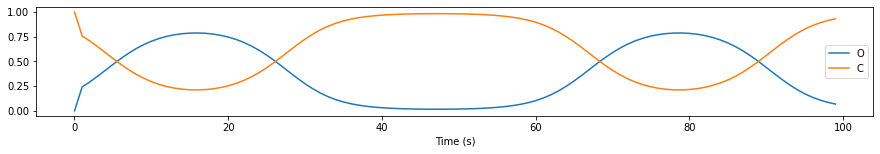

In [6]:
fig, ax = plt.subplots(figsize=(15,2))    
# fig.suptitle('New ORD-hERG - '+ ord._cell_types[cell_mode] +' cell', fontsize=16)
# ax.set_title('Simulation %d'%(simulationNo))
plt.xlabel('Time (s)')
# plt.ylabel('Voltage (mV)')     
ax.plot(model.solver.t, O, label='O')
ax.plot(model.solver.t, C, label='C')    
# ax.plot(times, kylie.active, label='Active')    
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
plt.show()
fig.savefig(os.path.join(result_folder, "Open_Active.jpg"), dpi=100)

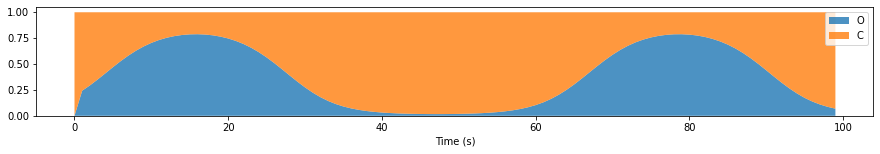

In [7]:
population_by_continent = {
    'O': O,
    'C': C,    
}
fig, ax = plt.subplots(figsize=(15,2))    
# fig.suptitle('New ORD-hERG - '+ ord._cell_types[cell_mode] +' cell', fontsize=16)
# ax.set_title('Simulation %d'%(simulationNo))
plt.xlabel('Time (s)')
# plt.ylabel('Voltage (mV)')     
ax.stackplot(times, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
# ax.plot(times, kylie.active, label='Active')    
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
plt.show()
fig.savefig(os.path.join(result_folder, "Open_Active.jpg"), dpi=100)

In [8]:
print("finish")

finish
